In [14]:
import numpy as np
import pandas as pd
import string
import sklearn
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [15]:
data = pd.read_csv("spam_ham_dataset.csv")

In [16]:
data

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [17]:
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [18]:
data.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [20]:
data.shape

(5171, 4)

In [21]:
data.drop(['label'],axis=1)

,Unnamed: 0,text,label_num
0,605,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,"Subject: photoshop , windows , office . cheap ...",1
4,2030,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...
5166,1518,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,Subject: industrial worksheets for august 2000...,0


In [22]:
data.drop_duplicates(inplace=True)

In [23]:
data.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [24]:
data.shape

(5171, 4)

In [25]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mangineniroopsagar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
def process_text(text):
  nopunc=[char for char in text if char not in string.punctuation]
  nopunc=''.join(nopunc)
  clean_words=[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
  return clean_words

In [27]:
data['text'].head().apply(process_text)

0    [Subject, enron, methanol, meter, 988291, foll...
1    [Subject, hpl, nom, january, 9, 2001, see, att...
2    [Subject, neon, retreat, ho, ho, ho, around, w...
3    [Subject, photoshop, windows, office, cheap, m...
4    [Subject, indian, springs, deal, book, teco, p...
Name: text, dtype: object

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
mod_msg=CountVectorizer(analyzer=process_text).fit_transform(data['text'])

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(mod_msg,data['label_num'],test_size=0.1,random_state=0)

In [30]:
mod_msg.shape

(5171, 50381)

In [31]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB().fit(X_train,y_train)

In [32]:
classifier.predict(X_train)

array([1, 0, 0, ..., 1, 0, 0])

In [33]:
y_train

871     1
1833    0
1695    0
4178    1
2953    0
       ..
4931    1
3264    1
1653    1
2607    0
2732    0
Name: label_num, Length: 4653, dtype: int64

In [34]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
pred=classifier.predict(X_train)
classification_report(y_train,pred)

'              precision    recall  f1-score   support\n\n           0       0.99      0.99      0.99      3303\n           1       0.98      0.97      0.98      1350\n\n    accuracy                           0.99      4653\n   macro avg       0.99      0.98      0.98      4653\nweighted avg       0.99      0.99      0.99      4653\n'

In [35]:
cm = confusion_matrix(y_train,pred)

In [36]:
cm

array([[3279,   24],
       [  34, 1316]])

In [37]:
acc = accuracy_score(y_train,pred)

In [38]:
acc

0.9875349237051365

In [39]:
classifier.predict(X_test)

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,

In [40]:
y_test.values

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,

In [41]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
pred=classifier.predict(X_test)
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       0.98      0.98      0.98       369\n           1       0.95      0.95      0.95       149\n\n    accuracy                           0.97       518\n   macro avg       0.96      0.97      0.96       518\nweighted avg       0.97      0.97      0.97       518\n'

In [42]:
cm = confusion_matrix(y_test,pred)

In [43]:
cm

array([[361,   8],
       [  7, 142]])

In [44]:
acc = accuracy_score(y_test,pred)

In [45]:
acc

0.971042471042471

<AxesSubplot:>

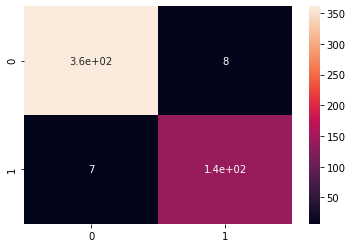

In [46]:
sns.heatmap(cm, annot=True)

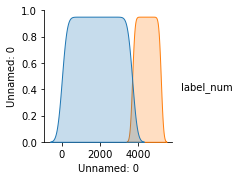

In [54]:
sns.pairplot(data, hue='label_num')

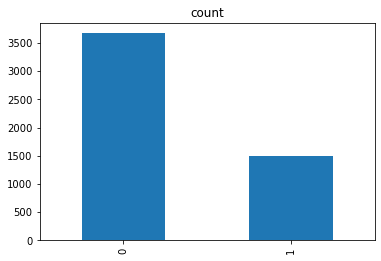

In [61]:
data['label_num'].value_counts().plot(kind='bar', title='count')
plt.show()

<AxesSubplot:xlabel='label_num', ylabel='Density'>

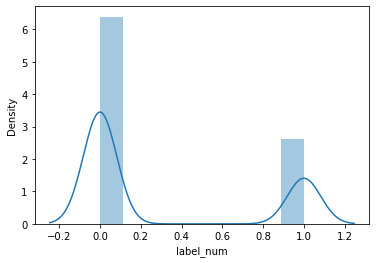

In [57]:
sns.distplot(data['label_num'])